In [1]:
import os
import sys
import csv
import argparse
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime, timedelta

from my_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# axes.titlesize : 24
# axes.labelsize : 20
# lines.linewidth : 3
# lines.markersize : 10
# xtick.labelsize : 16
# ytick.labelsize : 16

In [6]:
lr_files = glob(f'*.csv')
# print(lr_files)

plot_f = lr_files[0]
df = pd.read_csv(plot_f, index_col='timestamp', usecols=['timestamp', 'Occupied', 'Predictions', 'Probability'])
# ## Format dates
df['date'] = df.index
df['date'] = pd.to_datetime(df['date']) 
df.insert(loc=0, column='day', value=df['date'].dt.date)
df.insert(loc=1, column='hr_min_sec', value=df['date'].dt.time)


In [112]:
melt_df = pd.melt(df, value_vars=['Probability', 'Predictions', 'Occupied'], var_name='type', value_name='Occupancy', ignore_index=False)

melt_df['date'] = melt_df.index
melt_df['date'] = pd.to_datetime(melt_df['date']) 
melt_df.insert(loc=0, column='day', value=melt_df['date'].dt.date)
melt_df.insert(loc=1, column='hr_min_sec', value=melt_df['date'].dt.time)
print(melt_df)


                            day hr_min_sec         type  Occupancy  \
timestamp                                                            
2019-12-16 00:00:00  2019-12-16   00:00:00  Probability   0.980976   
2019-12-16 00:05:00  2019-12-16   00:05:00  Probability   0.982973   
2019-12-16 00:10:00  2019-12-16   00:10:00  Probability   0.994653   
2019-12-16 00:15:00  2019-12-16   00:15:00  Probability   0.972622   
2019-12-16 00:20:00  2019-12-16   00:20:00  Probability   0.955377   
...                         ...        ...          ...        ...   
2019-12-25 23:35:00  2019-12-25   23:35:00     Occupied   1.000000   
2019-12-25 23:40:00  2019-12-25   23:40:00     Occupied   1.000000   
2019-12-25 23:45:00  2019-12-25   23:45:00     Occupied   1.000000   
2019-12-25 23:50:00  2019-12-25   23:50:00     Occupied   1.000000   
2019-12-25 23:55:00  2019-12-25   23:55:00     Occupied   1.000000   

                                   date  
timestamp                                
2019-

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl_update = {
    'font.size': 18,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
#     'figure.figsize': [18, 10.0],
    'axes.labelsize': 24,
    'axes.titlesize': 24,
    'lines.linewidth': 1.5,
}
mpl.rcParams.update(mpl_update)

colors = [sns.color_palette("crest")[0], sns.color_palette("crest")[-2], sns.color_palette("flare")[0], sns.color_palette("flare")[-3]]
my4colorPalette = sns.set_palette(sns.color_palette(colors))
# sns.palplot(sns.color_palette(colors))


# sns.set_context('paper',
# font_scale=3, rc={'lines.linewidth':2.5})#, 'figure.figsize': [18, 10.0]})

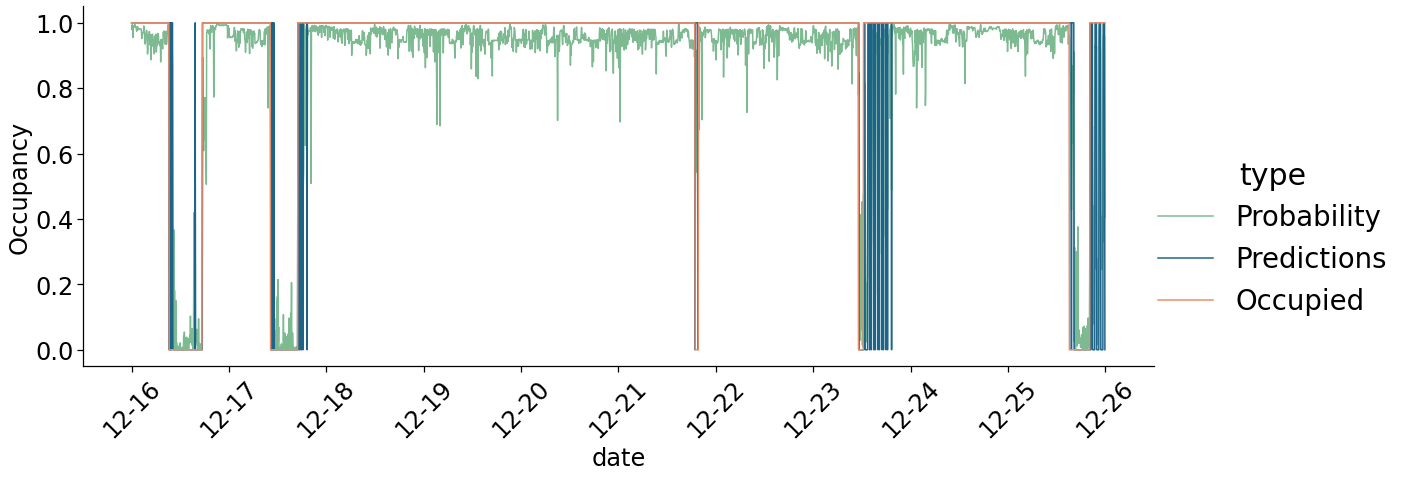

In [114]:
rc_update = {}
sns.set_context("notebook", font_scale=2.5, rc=mpl_update)
# myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%m-%d')

df['date'] = pd.to_datetime(df['date'])
g = sns.relplot(data=melt_df, x='date', y='Occupancy', hue='type', kind='line', height=6, aspect=2.7)
for axi in g.axes.flat:
    axi.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()
